In [30]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [31]:
# Cargar el dataset Wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [32]:
# Realizamos PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

In [33]:

# Convertimos el resultado del PCA a un DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_pca_df.head()



,PCA1,PCA2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [34]:
# Agrupamiento con MeanShift
mean_shift = MeanShift()
mean_shift_clusters = mean_shift.fit_predict(X_pca_df)
mean_shift_clusters



array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [35]:
# Agregamos las etiquetas de MeanShift al DataFrame de PCA
X_pca_df['MeanShift Cluster'] = mean_shift_clusters
X_pca_df.head()



,PCA1,PCA2,MeanShift Cluster
0,318.562979,21.492131,2
1,303.097420,-5.364718,2
2,438.061133,-6.537309,2
3,733.240139,0.192729,2
4,-11.571428,18.489995,0


In [36]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [37]:
# Agrupamiento con Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_pca_df[['PCA1', 'PCA2']])
gmm_clusters



array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0])

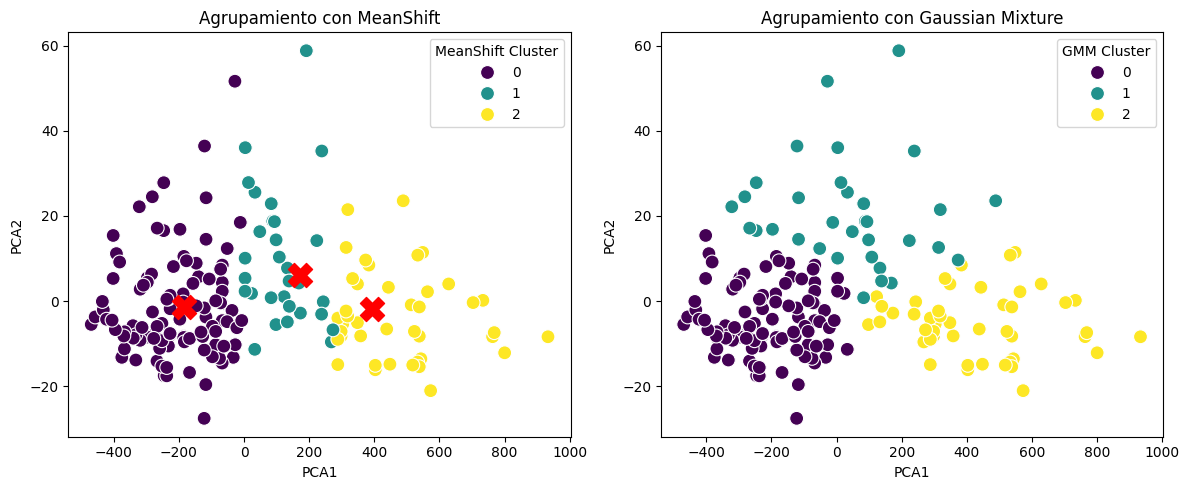

In [38]:
# Agregamos las etiquetas de GMM al DataFrame de PCA
X_pca_df['GMM Cluster'] = gmm_clusters

# Graficamos los resultados del agrupamiento con MeanShift
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='MeanShift Cluster', data=X_pca_df, palette='viridis', s=100)
plt.title('Agrupamiento con MeanShift')
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Centroides

# Graficamos los resultados del agrupamiento con Gaussian Mixture
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM Cluster', data=X_pca_df, palette='viridis', s=100)
plt.title('Agrupamiento con Gaussian Mixture')

plt.tight_layout()
plt.show()

In [39]:
# Importamos la librería necesaria para calcular distancias
from scipy.spatial import distance

# Seleccionamos dos puntos para comparar, por ejemplo, las primeras dos filas del DataFrame
punto_1 = X_pca_df.iloc[0][['PCA1', 'PCA2']].values
punto_2 = X_pca_df.iloc[1][['PCA1', 'PCA2']].values

# Calculamos la distancia Euclidiana
dist_euclidiana = distance.euclidean(punto_1, punto_2)

# Calculamos la distancia Manhattan
dist_manhattan = distance.cityblock(punto_1, punto_2)

# Calculamos la distancia Chebyshev
dist_chebyshev = distance.chebyshev(punto_1, punto_2)

# Mostramos los resultados
dist_euclidiana, dist_manhattan, dist_chebyshev


(30.991512411471597, 42.32240804615415, 26.85684841760397)

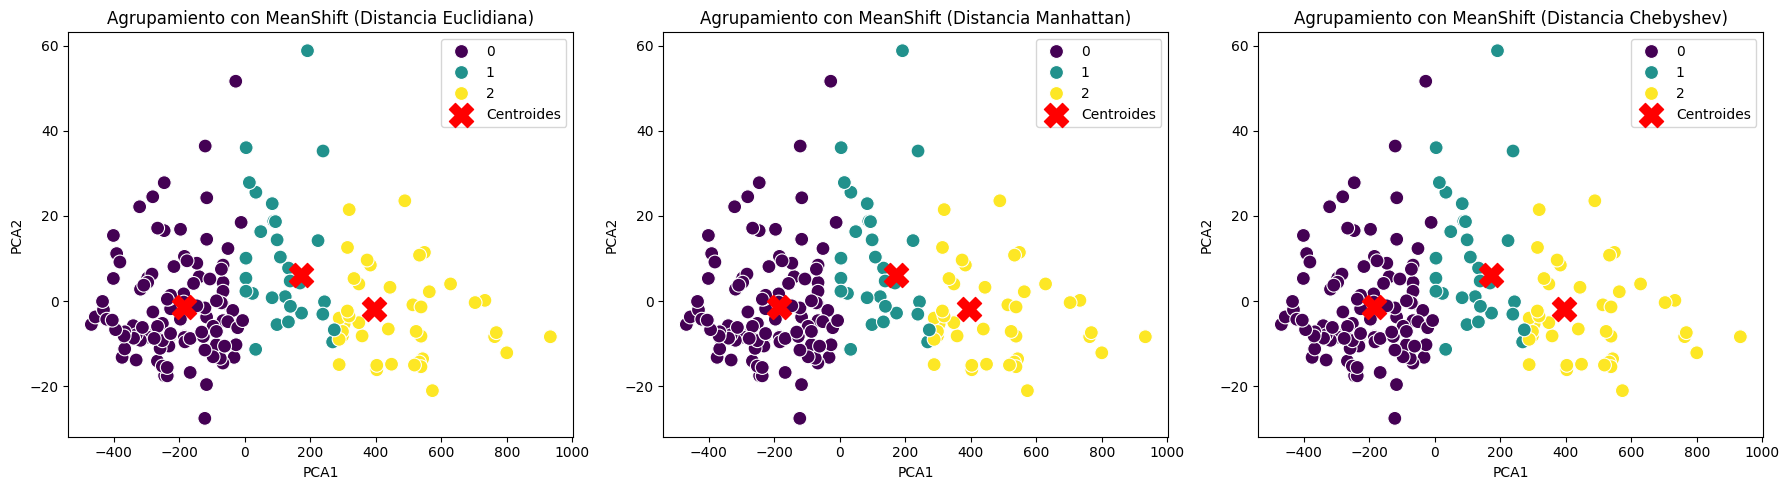

In [42]:
import seaborn as sns

# Creamos una figura con subgráficos para las tres distancias
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Distancia Euclidiana
sns.scatterplot(x='PCA1', y='PCA2', hue='MeanShift Cluster', data=X_pca_df, palette='viridis', s=100, ax=axs[0])
axs[0].set_title('Agrupamiento con MeanShift (Distancia Euclidiana)')
axs[0].scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
axs[0].legend()

# Distancia Manhattan
sns.scatterplot(x='PCA1', y='PCA2', hue='MeanShift Cluster', data=X_pca_df, palette='viridis', s=100, ax=axs[1])
axs[1].set_title('Agrupamiento con MeanShift (Distancia Manhattan)')
axs[1].scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
axs[1].legend()

# Distancia Chebyshev
sns.scatterplot(x='PCA1', y='PCA2', hue='MeanShift Cluster', data=X_pca_df, palette='viridis', s=100, ax=axs[2])
axs[2].set_title('Agrupamiento con MeanShift (Distancia Chebyshev)')
axs[2].scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
axs[2].legend()

# Graficar
plt.tight_layout()
plt.show()
